In [6]:
import pandas as pd
import regex as re

In [7]:
df=pd.read_csv('/content/drive/MyDrive/Challenge/data.csv',encoding='ISO-8859-1')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [9]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

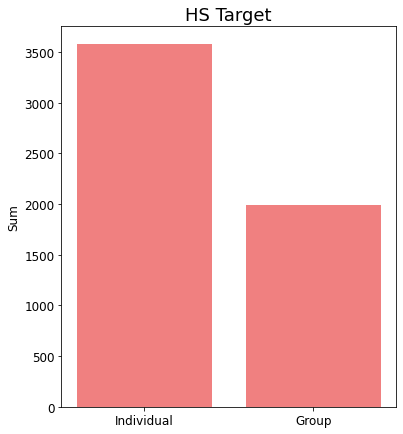

In [26]:
%matplotlib inline
target_HS = ("Individual", "Group")
HS1 = (3575, 1986)

plt.figure(figsize=(6,7))
plt.bar(target_HS, HS1, color='lightcoral')

plt.title('HS Target', size=18)
plt.ylabel('Sum', size=12)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [12]:

jenis_HS = df[["Tweet", "HS", "HS_Individual", "HS_Group", "HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other", "HS_Weak", "HS_Moderate", "HS_Strong"]]
jenis_HS.sum() 

Tweet            - disaat semua cowok berusaha melacak perhatia...
HS                                                            5561
HS_Individual                                                 3575
HS_Group                                                      1986
HS_Religion                                                    793
HS_Race                                                        566
HS_Physical                                                    323
HS_Gender                                                      306
HS_Other                                                      3740
HS_Weak                                                       3383
HS_Moderate                                                   1705
HS_Strong                                                      473
dtype: object

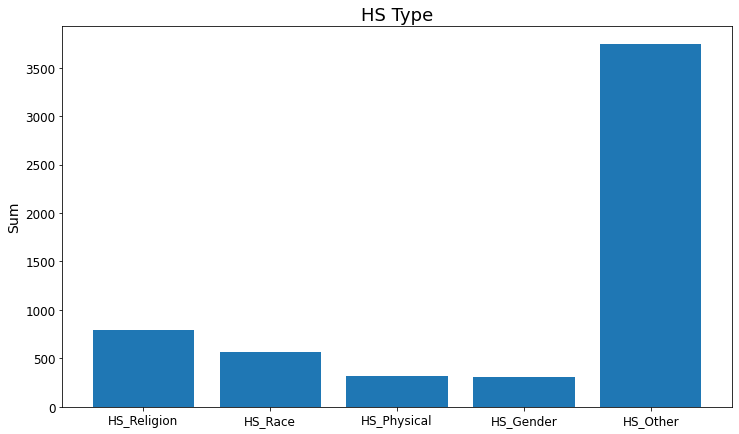

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

type_HS = ["HS_Religion", "HS_Race", "HS_Physical", "HS_Gender", "HS_Other"]
count = [793, 566, 323, 306, 3740]


plt.figure(figsize=(12,7))
plt.bar(type_HS, count)

plt.title('HS Type', size=18)
plt.ylabel('Sum', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

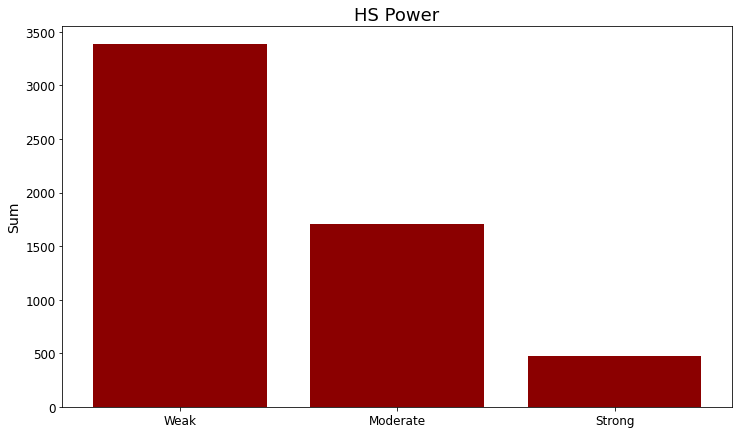

In [16]:
%matplotlib inline

power_HS = ["Weak", "Moderate", "Strong"]
phs = [3383, 1705, 473]


plt.figure(figsize=(12,7))
plt.bar(power_HS, phs, color="darkred")

plt.title('HS Power', size=18)
plt.ylabel('Sum', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [17]:
range(df.shape[0])

range(0, 13169)

In [18]:
df_alay=pd.read_csv('/content/drive/MyDrive/Challenge/new_kamusalay.csv',encoding='ISO-8859-1')
df_alay.head()

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin


In [22]:
df_abusive=pd.read_csv('/content/drive/MyDrive/Challenge/abusive.csv',encoding='ISO-8859-1')
df_abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [19]:
kamus_alay = pd.read_csv('/content/drive/MyDrive/Challenge/new_kamusalay.csv', encoding='ISO-8859-1', header=None)
kamus_alay = kamus_alay.rename(columns={0: 'Sebelum', 1: 'Sesudah'})
kamus_alay.head()

,Sebelum,Sesudah
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [25]:
import re

def lowercase(text):
    return text.lower() 

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) 
    text = re.sub('rt',' ',text) 
    text = re.sub('user',' ',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) 
    text = re.sub('  +', ' ', text)
    text = re.sub(r'pic.twitter.com.[\w]+', '', text) 
    text = re.sub('gue','saya',text)
    text = re.sub(r':', '', text)
    text = re.sub(r'‚Ä¶', '', text)
    return text

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text


kamus_alay_map = dict(zip(kamus_alay['Sebelum'], kamus_alay['Sesudah']))


def normalize_alay(text):
    return ' '.join([kamus_alay_map[word] if word in kamus_alay_map else word for word in text.split(' ')])


print("remove_nonaplhanumeric: ", remove_nonaplhanumeric("Halooo,,,,, duniaa!!"))
print("lowercase: ", lowercase("Halooo, duniaa!"))
print("remove_unnecessary_char: ", remove_unnecessary_char("Hehe\n\n RT rt USER USER apa kabs www.google.com\n  hehe"))
print("normalize_alay: ", normalize_alay("aamiin adek abis"))

remove_nonaplhanumeric:  Halooo duniaa 
lowercase:  halooo, duniaa!
remove_unnecessary_char:  Hehe RT USER USER apa kabs hehe
normalize_alay:  amin adik habis


In [21]:
def preprocess(text):
    text = lowercase(text)
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = normalize_alay(text)
    return text